# 9. This question involves the use of multiple linear regression on the Auto data set.

## (a) Produce a scatterplot matrix which includes all of the variables in the data set.
## (b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable, cor() which is qualitative.
## (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
* i. Is there a relationship between the predictors and the re-sponse?
* ii. Which predictors appear to have a statistically significant relationship to the response?
* iii. What does the coefficient for the year variable suggest?

## (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit.Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
## (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
## (f) Try a few different transformations of the variables, such as log(X), √X, X^2 . Comment on your findings.

_____________________________________________________________________________________________________________________________

# The first step which we need to take is to analyze our data first and understand all the features available to us so that we can use them in building our Model and answering all the above questions.

______________________________________________________________________________

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Dataset

In [2]:
auto_data = pd.read_csv("Auto.csv")

# First 5 values in the Dataset

In [3]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


# Shape of the Data : (Number of rows,Number of columns)

In [4]:
auto_data.shape

(397, 9)

# Let's list Qualitative and Quantitative Features we are working and also their Datatype.

In [5]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


* __We can observe that except `name` every feature/variable is a Quantitative feature where as `name` is a Qualitative Feature.__

# Checking for Missing Values

In [6]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

* __Horsepower has 5 Null Values. We can fix that by replacing the Null Values with the mean of a Horsepower Column.__

In [7]:
auto_data['horsepower'] = auto_data['horsepower'].fillna(auto_data['horsepower'].mean())

In [8]:
auto_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

# Get Descriptive Statistics of our Data which gives us info about the mean, Standard Deviation and percent Quantiles, minimum and maximum value in each column along with count of each column.

In [9]:
auto_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.247388,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


______________________________________________________________________________

# Answering Exercise Questions
# Numerical Analysis and Visualization

## Question 9.(a) Produce a scatterplot matrix which includes all of the variables in the data set.

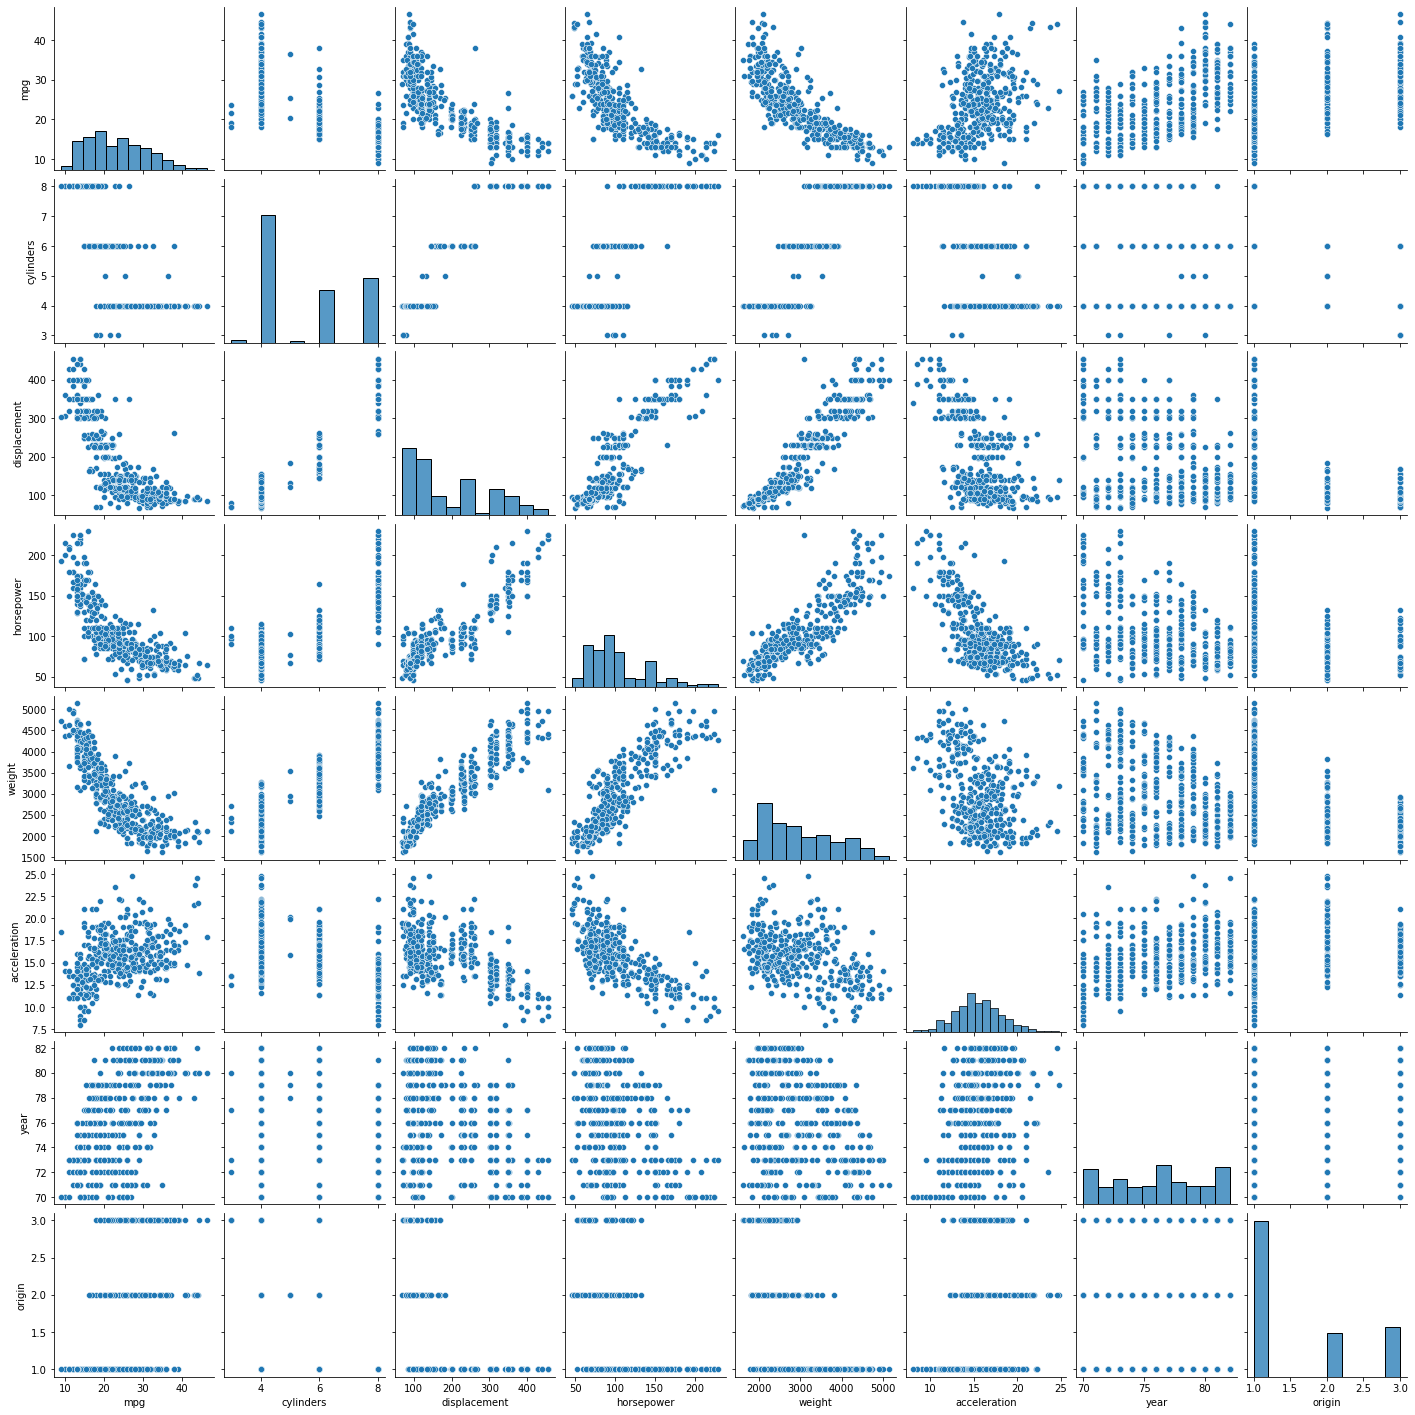

In [10]:
sns.pairplot(auto_data);

### Pairplot helps us identify the relationship of variables/features with each-other.
* __mpg shows a correlation with displacement, horsepower, weight and acceleration.__
* __Cylinders shows no correlation with any of the available which is very suprising. We would like to confirm this using a Correlation matrix.__
* __displacement shows correlation with mpg, horsepower, weight and acceleration.__
* __horsepower shows correlation with mpg, displacement, weight and acceleration.__
* __weight shows correlation with mpg, displacement, horsepower and acceleration.__
* __acceleration shows correlation with mpg, displacement, horsepower and weight.__
* __Year and Origin have no correlation with any of the features or variables available to us.__

## Question 9. (b) Compute the matrix of correlations between the variables using the function cor() . You will need to exclude the name variable, cor() which is qualitative.

In [11]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000


### Findings from the Correlation Matrix are
* __mpg shows a Strong Negative Correlation with displacement, horsepower, weight and Cylinders wheres as a Medium Positive Correlation with acceleration.__
* __Here's the intresting thing which we can observe in cylinder column, It shows no correlation when we plot a Scatter Plot against other variables but as we observe Correlation Matrix, It shows Strong Negative Correlation with mpg, Low Negative Correlation with acceleration, Strong Positive Correlation with displacement, horsepower and Weight.__
* __displacement shows Strong Negative Correlation with mpg, Low Negative Correlation with acceleration and Strong Positive Correlation with Cylinders, horsepower, weight.__
* __horsepower shows Strong Negative Correlation with mpg, Low Negative Correlation with acceleration, Strong Positive Correlation with Cylinders, displacement, weight.__
* __weight shows Strong Negative Correlation with mpg, Low Negative Correlation with acceleration and Strong Positive Correlation with cylinders, displacement and horsepower.__
* __acceleration shows Medium Negative Correlation with displacemnt and horsepower, Low Negative Correlation with cylinders and weight, and Low Positive Correlation with mpg.__
* __Year and Origin show fairly low Negative and Postive correlation with other features and Variables.__

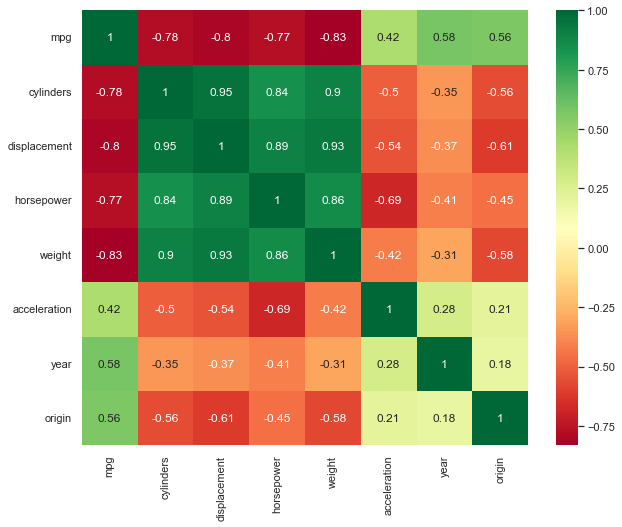

In [12]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(auto_data.corr(),cmap="RdYlGn",annot=True);
plt.show()

## Question 9.(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
### i. Is there a relationship between the predictors and the re-sponse?
### ii. Which predictors appear to have a statistically significant relationship to the response?
### iii. What does the coefficient for the year variable suggest?


# Multiple Linear Regression is a prediction technique in which we try to predict a Single Variable based on Multiple Predictor Variables.

# Everything in Multiple Linear Regression is similar to Simple Linear Regression "EXCEPT" in Multiple Linear Regression our X=[Multiple Variables(Predictor VAriables)] and Y=[Response Variable]

# Here, X=[cylinders, displacement, horsepower, weight, acceleration, year, origin] and Y=[mpg]

# We will be evaluating our Multiple Linear Regression model on the basis of Same Equation: Y = c + mX
* Here, __m__ is known as the Slope. 
* __c__ is the y-intercept value (i.e) The value of y when x=0.

## Importing necessary Libraries for Training and building a model.

In [13]:
import statsmodels.api as sm

In [14]:
X = auto_data[['cylinders','displacement','horsepower','weight',
              'acceleration','year','origin']]
y = auto_data['mpg']

In [15]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


In [16]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

## adding a constant to X 
### The reason we add a constant to our Data is to ensure our model is unbiased. 

In [17]:
X = sm.add_constant(X)

## Fitting the Model using OLS(Ordinary Least Square) method present in the statsmodels.api

In [18]:
model = sm.OLS(y,X).fit()

# Model Parameters to get the value of Intercept and Slope

In [19]:
model.params

const          -18.711572
cylinders       -0.445205
displacement     0.018913
horsepower      -0.009394
weight          -0.006732
acceleration     0.117888
year             0.762458
origin           1.396799
dtype: float64

In [20]:
round(model.params,3)

const          -18.712
cylinders       -0.445
displacement     0.019
horsepower      -0.009
weight          -0.007
acceleration     0.118
year             0.762
origin           1.397
dtype: float64

# The y-intercept value is -18.712

# Here Equation of Multiple Linear Regression model becomes:

# y = -18.712 + (-0.445 * cylinders) + (0.019 * displacement) + (-0.009 * horsepower) + (-0.007 * weight) + (0.118 * acceleration) + (0.762 * year) + (1.397 * origin)

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          2.41e-141
Time:                        02:18:28   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Let's analyze R-squared value, p-Value

## R-Squared value : Here R-squared value is 0.822 which means that 82.2% of mpg variance can be predicted on the basis of other features or variables available to us.

## p-Value : p-Value is close to zero, hence we can reject our Null Hypothese and consider that our model is significant.

# Let's predict y on the basis of our model

In [22]:
y_pred = model.predict(X)

In [23]:
print("The predicted Values are :")
print(y_pred)

The predicted Values are :
0      14.904858
1      14.057937
2      15.264933
3      15.138241
4      14.909805
         ...    
392    28.321455
393    34.728806
394    31.106678
395    29.473476
396    28.881112
Length: 397, dtype: float64


# Residual Analysis :
## Dealing with Residuals in Linear Regression we assume that Residuals should follow a pattern of Normal Distribution.
# Error(Residuals) = Actual y Value - y Predicted Value

In [24]:
y_residual = pd.DataFrame({'Actual Value' : y, 'Predicted Value' : y_pred, 'Residual' : y - y_pred})

In [25]:
y_residual

,Actual Value,Predicted Value,Residual
0,18.0,14.904858,3.095142
1,15.0,14.057937,0.942063
2,18.0,15.264933,2.735067
3,16.0,15.138241,0.861759
4,17.0,14.909805,2.090195
...,...,...,...
392,27.0,28.321455,-1.321455
393,44.0,34.728806,9.271194
394,32.0,31.106678,0.893322
395,28.0,29.473476,-1.473476


## Let's plot a Histogram to see if our Residuals are Normally Distributed

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


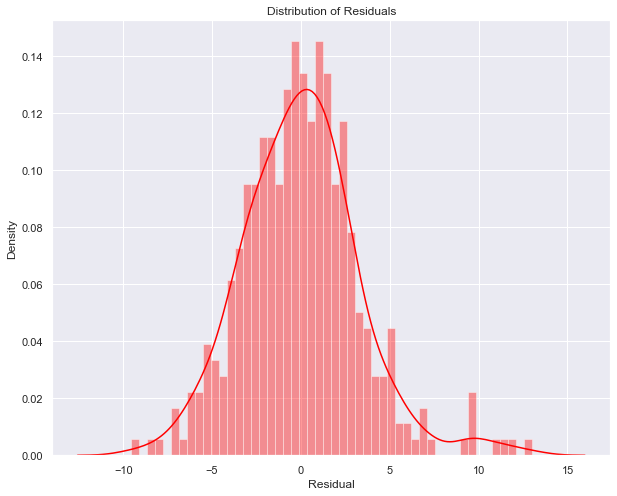

In [26]:
sns.distplot(y_residual['Residual'],color='red',bins=50)
plt.title('Distribution of Residuals')
plt.show()

## We can clearly observe that Residuals follow a path of Normal Distribution.

# Plotting actual y and predicted y

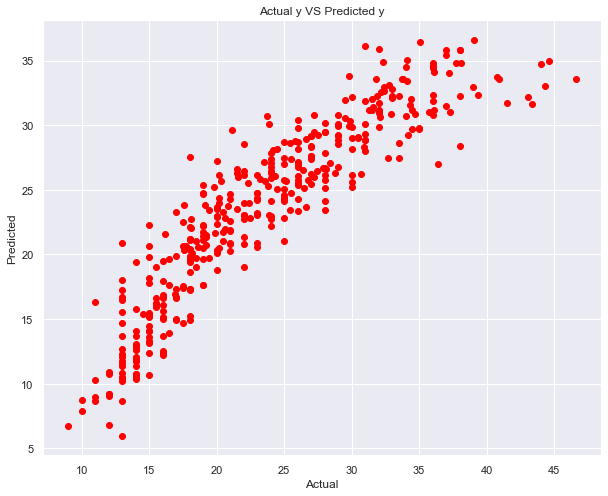

In [27]:
plt.scatter(y, y_pred, c='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual y VS Predicted y")
plt.show();

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


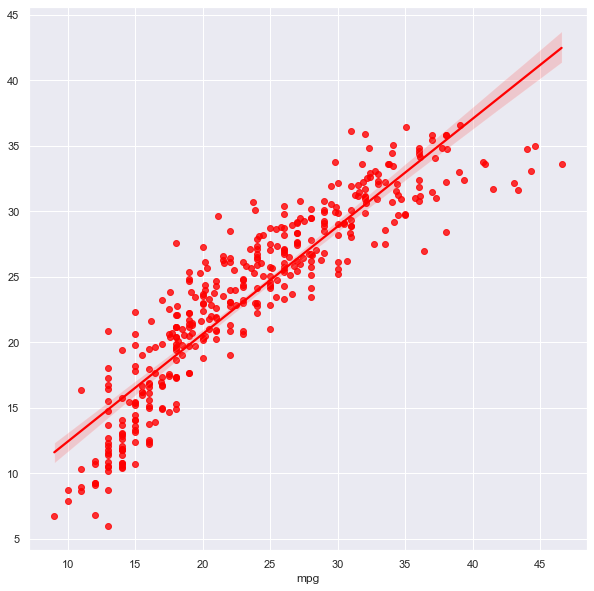

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
sns.regplot(y,y_pred,color='red');

# Evaluating the Model

In [29]:
from sklearn import metrics

In [30]:
mean_absolute_error = metrics.mean_absolute_error(y,y_pred)
mean_squared_error = metrics.mean_squared_error(y,y_pred)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y,y_pred))

In [31]:
print("Mean Absolute Error : ",round(mean_absolute_error,3))
print("Mean Squared Error : ",round(mean_squared_error,3))
print("Root Mean Squared Error : ",round(root_mean_squared_error,3))

Mean Absolute Error :  2.508
Mean Squared Error :  10.897
Root Mean Squared Error :  3.301


## Mean Absolute Error : Mean Absolute Error is the Absolute difference between actual value and predicted values. The lower the value, the better is the model performance. The Mean Absolute Error calculated for this model is 2.508

## Mean Square Error = Mean Square value is calculated by taking the average of square of difference between actual value and predicted value. Mean Square Error for this model is 10.897

## Root Mean Squared Error = Root Mean Squared Error is the Standard Deviation of the errors which occur when prediction is made on the Dataset. In this model Root Mean Squared Error is 3.301

In [32]:
y_residual

,Actual Value,Predicted Value,Residual
0,18.0,14.904858,3.095142
1,15.0,14.057937,0.942063
2,18.0,15.264933,2.735067
3,16.0,15.138241,0.861759
4,17.0,14.909805,2.090195
...,...,...,...
392,27.0,28.321455,-1.321455
393,44.0,34.728806,9.271194
394,32.0,31.106678,0.893322
395,28.0,29.473476,-1.473476


# If we observe this table we can conclude that the difference between the Actual Value of mpg(Gas Mileage) and Predicted Value of mpg(Gas mileage) is not so high and hence we can predict mpg(Gas mileage) approximately on the basis of this model.

# We have also seen R-squared value of this model which is 0.822 which suggests that 82.2 % variance of mpg can be predicted using other features/variables present in the Dataset.

_______________________________________________________________________________

# Question 9.(c) i. Is there a relationship between the predictors and the re-sponse?

## Answer : Yes, there is a relationship between response variable mpg (Gas Mileage) and Predictor Variables such as cylinders, displacement, horsepower, weight, acceleration, year, origin. We can say that on the basis of p-value which is close to 0 and we can reject the Null Hypothesis. We can also say that on the basis of Correlation Matrix and also model's R-squared value is 0.822 which means Model can predict 82.2 % of mpg values on the basis of other variables.

_____________________________________________________________________________

# Question 9.(c)ii. Which predictors appear to have a statistically significant relationship to the response?

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          2.41e-141
Time:                        02:18:31   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060      0.000     -27.773      -9.650
cylinders       -0.4452      0.323     -1.380      0.168      -1.079       0.189
displacement     0.0189      0.007      2.524      0.012       0.004       0.034
horsepower      -0.0094      0.013     -0.709      0.479      -0.035       0.017
weight          -0.0067      0.001    -10.508      0.000      -0.008      -0.005
acceleration     0.1179      0.097      1.217      0.224      -0.073       0.308
year             0.7625      0.051     15.071      0.000       0.663       0.862
origin           1.3968      0.275      5.073      0.000       0.855       1.938
==============================================================================
Omnibus:                       29.782   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.819
Skew:                           0.506   Prob(JB):                     4.13e-11
Kurtosis:                       4.366   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Answer : Here, we can see the p-Value associated with each variable. Therefore p-Value of weight, year, origin and displacement is less that 0.05 which interprets that these variables are significant where as cylinders, horsepower, acceleration have their p-Value more than 0.05

_______________________________________________________________________

# Question 9.(c).iii. What does the coefficient for the year variable suggest?

## Answer : Year has coefficient of 0.7625. It means if year increases by 1 year then average mpg increases by 0.7625

______________________________________________________________________________

# 9. (d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit.Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

# Let's Plot Diagnostic Plots

In [34]:
res = auto_data.copy()

In [35]:
res['resid'] = model.resid

In [36]:
res['fitted_values'] = model.fittedvalues

In [37]:
res['resid_std'] = model.resid_pearson

In [38]:
res['leverage'] = model.get_influence().hat_matrix_diag

In [39]:
res

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,resid,fitted_values,resid_std,leverage
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3.095142,14.904858,0.928141,0.022920
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0.942063,14.057937,0.282497,0.017888
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,2.735067,15.264933,0.820166,0.021380
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0.861759,15.138241,0.258416,0.021862
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,2.090195,14.909805,0.626787,0.025726
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,-1.321455,28.321455,-0.396265,0.019175
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,9.271194,34.728806,2.780156,0.047662
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0.893322,31.106678,0.267881,0.032936
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,-1.473476,29.473476,-0.441852,0.017448


## There are 4 types of Diagnostic Plots:
- Residual vs Fitted
- Normal Q-Q
- Scale-Location
- Residual vs Leverage

## Residual vs Fitted

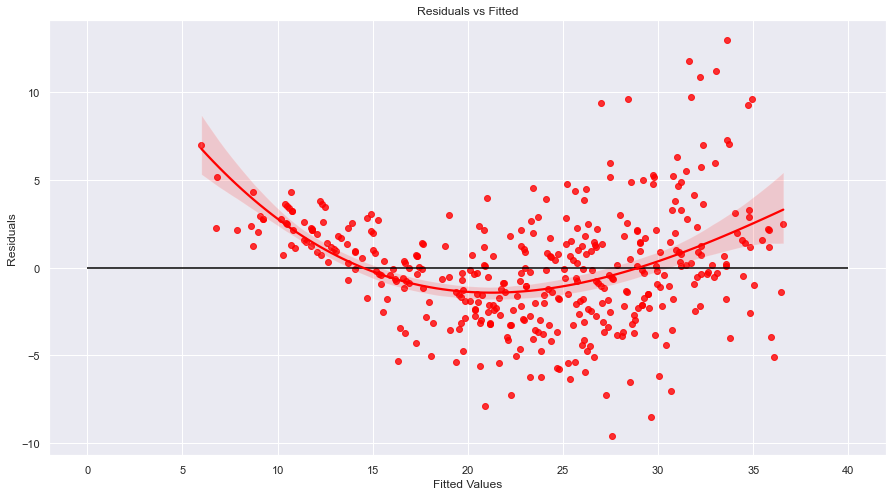

In [40]:
sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(x=res['fitted_values'],y=res['resid'],color='red',order=3)
plt.hlines(y=0,xmin=0,xmax=40,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show();

__In general, the point look quite scattered but at the same we can also observe that the data points get wider and shows a bit curve in the plot.Although there isn't any clear visible patterns but model doesn't look like it's the best fit.__

## Normal Q-Q

In [41]:
import pingouin as pg

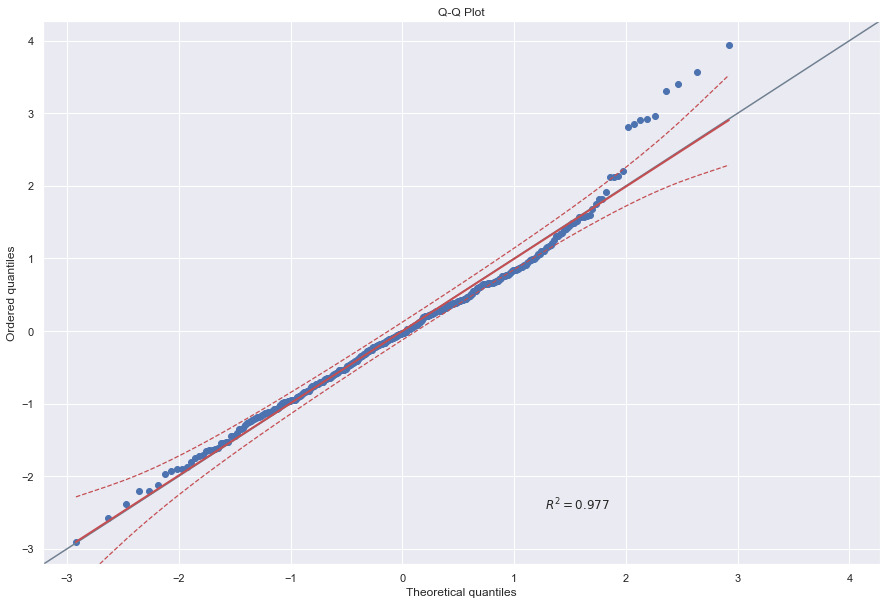

In [42]:
pg.qqplot(res['resid'],dist='norm', figsize=(15,10));

__Here, In the Normal Q-Q plot we check for Normal Distribution of the Data Points and If we look closely, Most of the Data Points look Normally Distributed except few Data Points in Top right region act differently.Thus we can say that residuals are normally distributed__

## Scale-Location

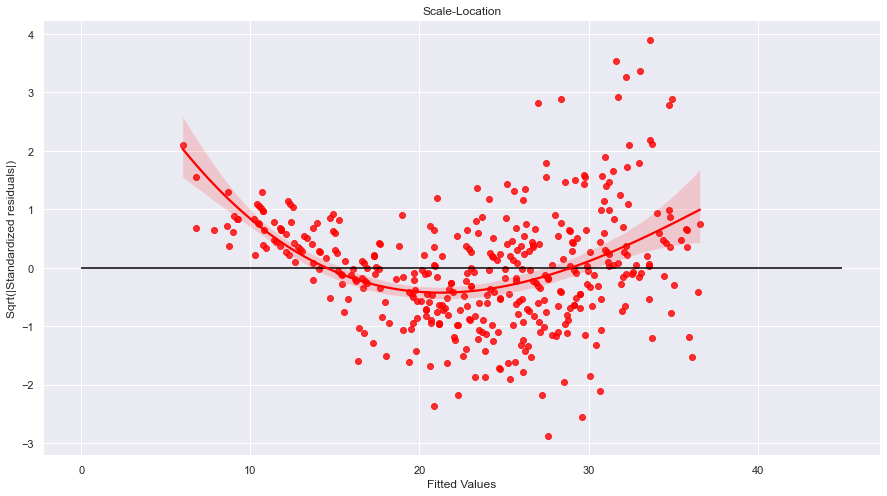

In [43]:
sns.regplot(x=res['fitted_values'],y=res['resid_std'],color='red',order=3)
plt.hlines(y=0,xmin=0,xmax=45,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Standardized residuals|)")
plt.title("Scale-Location")
plt.show()

__Most of the data points look uniformly distributed, However the data points present after value 25 on the X-axis get wider on the y-axis.__

## Residual vs leverage

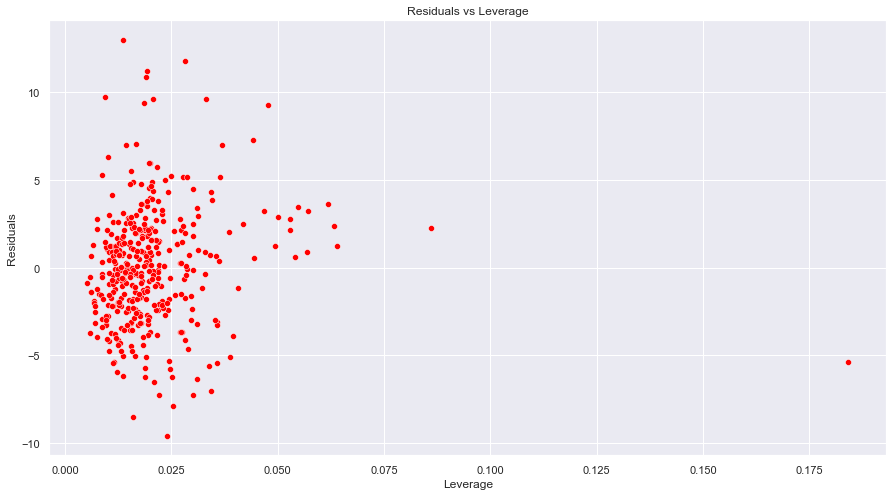

In [44]:
sns.scatterplot(x=res['leverage'],y=res['resid'],color='red')
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.show()

__If we observe Residual vs Leverage plot then we can see that there are two points which way off than other points and these points can be influential to our model in a good or bad way.__

## We can also clearly observe from our Residual vs Fitted plots there are few outliers present in the our Data.

___________________________________________________________________________________________________________________________

# Question 9 (e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [45]:
auto_data['cylinders_horsepower'] = auto_data['cylinders'] * auto_data['horsepower']
auto_data['acceleration_horsepower'] = auto_data['acceleration'] * auto_data['horsepower']

In [46]:
auto_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,cylinders_horsepower,acceleration_horsepower
mpg,1.000000,-0.776260,-0.804443,-0.771441,-0.831739,0.422297,0.581469,0.563698,-0.773522,-0.778168
cylinders,-0.776260,1.000000,0.950920,0.839715,0.897017,-0.504061,-0.346717,-0.564972,0.932566,0.772135
displacement,-0.804443,0.950920,1.000000,0.893833,0.933104,-0.544162,-0.369804,-0.610664,0.949565,0.792499
horsepower,-0.771441,0.839715,0.893833,1.000000,0.860581,-0.687039,-0.413022,-0.453962,0.970573,0.842109
weight,-0.831739,0.897017,0.933104,0.860581,1.000000,-0.419502,-0.307900,-0.581265,0.894761,0.875427
acceleration,0.422297,-0.504061,-0.544162,-0.687039,-0.419502,1.000000,0.282901,0.210084,-0.633860,-0.245275
year,0.581469,-0.346717,-0.369804,-0.413022,-0.307900,0.282901,1.000000,0.184314,-0.405641,-0.323470
origin,0.563698,-0.564972,-0.610664,-0.453962,-0.581265,0.210084,0.184314,1.000000,-0.498016,-0.486705
cylinders_horsepower,-0.773522,0.932566,0.949565,0.970573,0.894761,-0.633860,-0.405641,-0.498016,1.000000,0.826404
acceleration_horsepower,-0.778168,0.772135,0.792499,0.842109,0.875427,-0.245275,-0.323470,-0.486705,0.826404,1.000000


## cylinders_horsepower column shows Strong Negative Correlation with mpg which is our response variable and shows Strong positive Correlation with cylinders, displacement, horsepower and weight.
## acceleration_horsepower column also shows Strong Negative Correlation with mpg which is our response variable and shows Strong positive Correlation with cylinders, displacement, horsepower and weight.

# Training and Building a model for our New Interactions

In [47]:
X_interaction = auto_data[['cylinders','displacement','horsepower','weight',
              'acceleration','year','origin','cylinders_horsepower','acceleration_horsepower']]
y_interaction = auto_data['mpg']

# Adding a Constant to our new X

In [48]:
X_interaction = sm.add_constant(X_interaction)

# Model Fitting

In [49]:
model_interaction = sm.OLS(y_interaction,X_interaction).fit()

# Model Parameter

In [50]:
model_interaction.params

const                      0.319790
cylinders                 -3.398126
displacement              -0.007027
horsepower                -0.211071
weight                    -0.004172
acceleration               0.179151
year                       0.759262
origin                     0.796454
cylinders_horsepower       0.033098
acceleration_horsepower   -0.003136
dtype: float64

In [51]:
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     259.7
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          5.40e-158
Time:                        02:18:34   Log-Likelihood:                -992.25
No. Observations:                 397   AIC:                             2005.
Df Residuals:                     387   BIC:                             2044.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3198      6.555      0.049      0.961     -12.569      13.208
cylinders                  -3.3981      0.569     -5.971      0.000      -4.517      -2.279
displacement               -0.0070      0.008     -0.909      0.364      -0.022       0.008
horsepower                 -0.2111      0.052     -4.040      0.000      -0.314      -0.108
weight                     -0.0042      0.001     -6.323      0.000      -0.005      -0.003
acceleration                0.1792      0.188      0.951      0.342      -0.191       0.550
year                        0.7593      0.045     16.764      0.000       0.670       0.848
origin                      0.7965      0.255      3.127      0.002       0.296       1.297
cylinders_horsepower        0.0331      0.005      7.264      0.000       0.024       0.042
acceleration_horsepower    -0.0031      0.002     -1.569      0.118      -0.007       0.001
==============================================================================
Omnibus:                       39.826   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.900
Skew:                           0.595   Prob(JB):                     8.97e-17
Kurtosis:                       4.746   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## If we focus on R-squared value which is 0.858 then we can see that we can predict 85.8 % mpg variance on the basis of our new model. However when we observe p-Value which is 0.961 then we can say the our new model seems insignificant as the p-Value is way higher than 0.05.

## Considering the p-Valuue of predictor variables, the interaction cylinders_horsepower seems statistically significant as it has a p-Value close to zero.

# Predicting y (mpg) on the basis of New Model

In [52]:
y_pred_interaction = model_interaction.predict(X_interaction)

# Plotting Diagnostic Plots

In [53]:
res_interaction = auto_data.copy()

In [54]:
res_interaction['resid'] = model_interaction.resid

In [55]:
res_interaction['fitted_values'] = model_interaction.fittedvalues

In [56]:
res_interaction['resid_std'] = model_interaction.resid_pearson

In [57]:
res_interaction['leverage'] = model_interaction.get_influence().hat_matrix_diag

# Residual vs Fitted Values

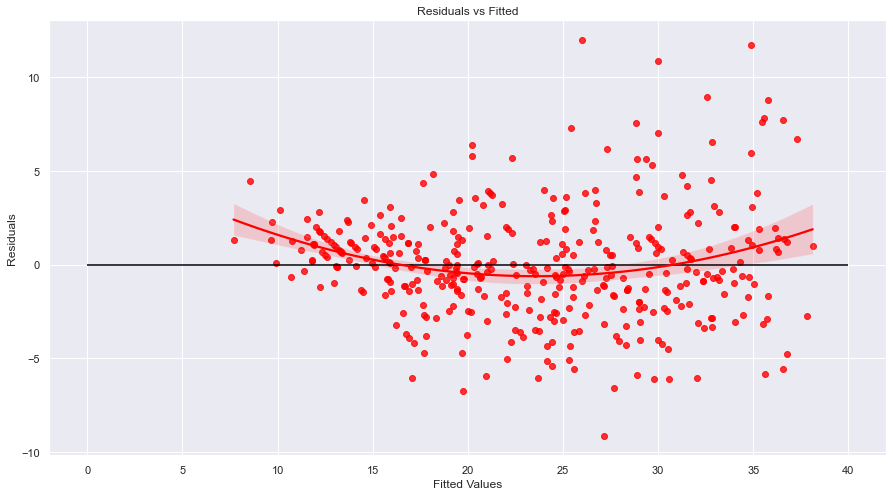

In [58]:
sns.set(rc={'figure.figsize':(15,8)})
sns.regplot(x=res_interaction['fitted_values'],y=res_interaction['resid'],color='red',order=2)
plt.hlines(y=0,xmin=0,xmax=40,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show();

## The spread of data points look more evenly distributed as compared to our Original Model. This is a good thing as this is sign of non linearity between predictor variable and response variable. Although we can observe few outliers in our plot.


# Normal Q-Q Plot

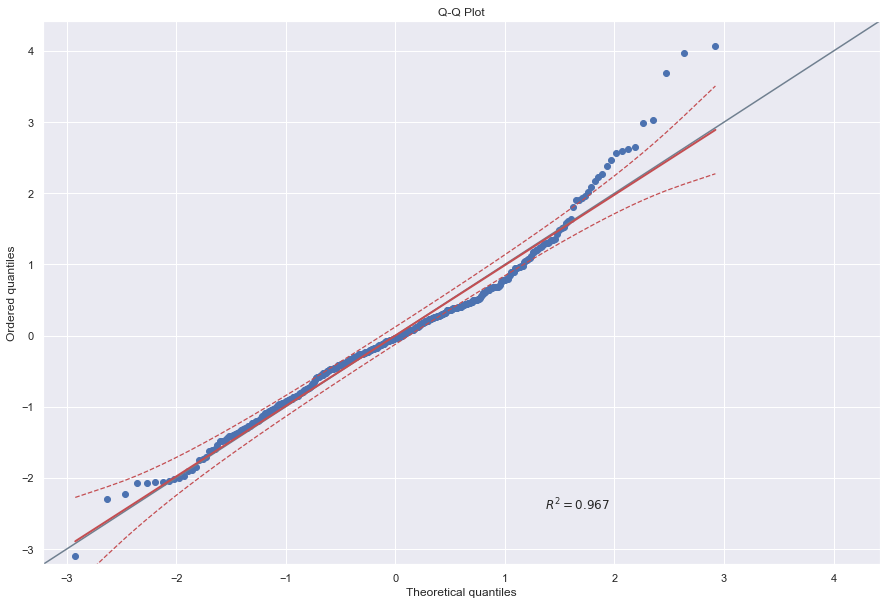

In [59]:
pg.qqplot(res_interaction['resid'],dist='norm',figsize=(15,10));

## The Normal Q-Q plots looks Slightly skewed at the Top Right end region of the plot, however the it is Thin Tailed skewness which suggests residuals follow a path of Normal Distribution.

# Scale-Location

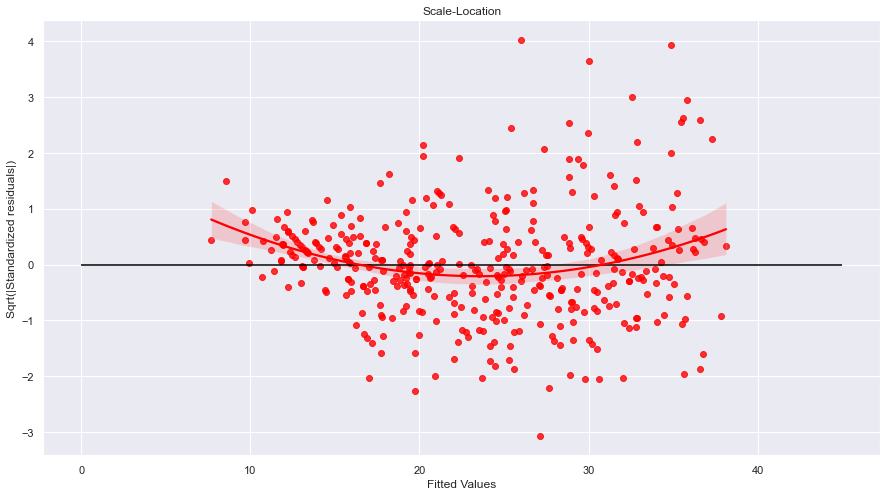

In [60]:
sns.regplot(x=res_interaction['fitted_values'],y=res_interaction['resid_std'],color='red',order=2)
plt.hlines(y=0,xmin=0,xmax=45,color='black')
plt.xlabel("Fitted Values")
plt.ylabel("Sqrt(|Standardized residuals|)")
plt.title("Scale-Location")
plt.show()

## The plot looks evenly distributed and some points overlapping each other. 3-4 data points looks can be seen wider than usual points.

# Residual Leverage

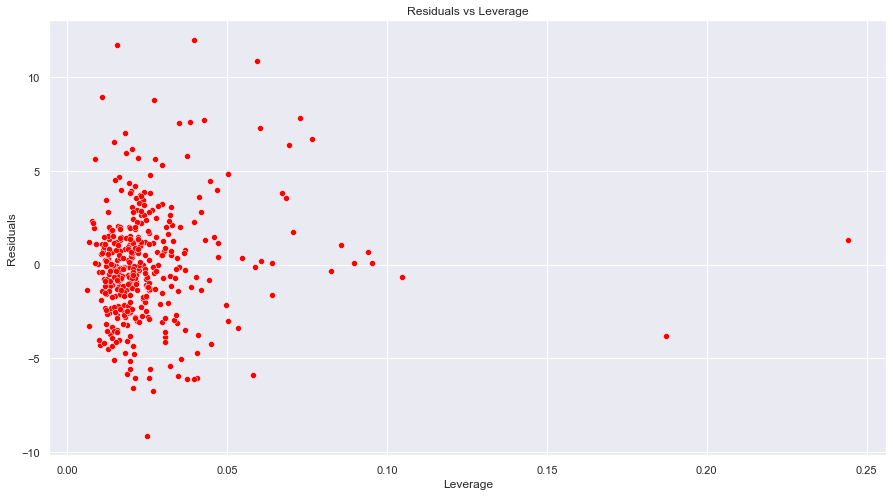

In [61]:
sns.scatterplot(x=res_interaction['leverage'],y=res_interaction['resid'],color='red')
plt.title("Residuals vs Leverage")
plt.xlabel("Leverage")
plt.ylabel("Residuals")
plt.show()

## We can potentially observe 4 to 5 points which can influence our model and can be of High Leverage.

_______________________________________________________________________________

## Question 9. (f) Try a few different transformations of the variables, such as log(X), √X, X^2 . Comment on your findings.

# Answer
# 1. Log(X) - Log of X
# 2. √X        - Sqaure root of X
# 3. X^2      - Square of X

In [62]:
X

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,8,307.0,130.0,3504,12.0,70,1
1,1.0,8,350.0,165.0,3693,11.5,70,1
2,1.0,8,318.0,150.0,3436,11.0,70,1
3,1.0,8,304.0,150.0,3433,12.0,70,1
4,1.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,1.0,4,140.0,86.0,2790,15.6,82,1
393,1.0,4,97.0,52.0,2130,24.6,82,2
394,1.0,4,135.0,84.0,2295,11.6,82,1
395,1.0,4,120.0,79.0,2625,18.6,82,1


## Let's try to remove constant column from our DataFrame.

In [63]:
X_new = X.loc[:,X.columns != 'const']

In [64]:
X_new.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,8,307.0,130.0,3504,12.0,70,1
1,8,350.0,165.0,3693,11.5,70,1
2,8,318.0,150.0,3436,11.0,70,1
3,8,304.0,150.0,3433,12.0,70,1
4,8,302.0,140.0,3449,10.5,70,1


# 1. Log(X) - Log of all the Variables in X
## Take log of all the variables present in 'X' and then try to fit the model again.

In [65]:
X_log = np.log2(X_new[['cylinders','displacement','horsepower','weight','acceleration','year','origin']])

In [66]:
X_log.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,3.0,8.262095,7.022368,11.774787,3.584963,6.129283,0.0
1,3.0,8.451211,7.366322,11.850578,3.523562,6.129283,0.0
2,3.0,8.312883,7.228819,11.746514,3.459432,6.129283,0.0
3,3.0,8.247928,7.228819,11.745254,3.584963,6.129283,0.0
4,3.0,8.238405,7.129283,11.751962,3.392317,6.129283,0.0


## Adding a Constant to our New X

In [67]:
X_log = sm.add_constant(X_log)

In [68]:
X_log.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,3.0,8.262095,7.022368,11.774787,3.584963,6.129283,0.0
1,1.0,3.0,8.451211,7.366322,11.850578,3.523562,6.129283,0.0
2,1.0,3.0,8.312883,7.228819,11.746514,3.459432,6.129283,0.0
3,1.0,3.0,8.247928,7.228819,11.745254,3.584963,6.129283,0.0
4,1.0,3.0,8.238405,7.129283,11.751962,3.392317,6.129283,0.0


## Fitting the Model

In [69]:
model_log = sm.OLS(y,X_log).fit()

## Model Parameters

In [70]:
model_log.params

const          -69.280991
cylinders        1.266692
displacement    -0.817278
horsepower      -3.652926
weight          -9.927477
acceleration    -2.530881
year            38.970914
origin           1.033148
dtype: float64

In [71]:
round(model_log.params,3)

const          -69.281
cylinders        1.267
displacement    -0.817
horsepower      -3.653
weight          -9.927
acceleration    -2.531
year            38.971
origin           1.033
dtype: float64

In [72]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     307.0
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          3.99e-154
Time:                        02:18:37   Log-Likelihood:                -1007.3
No. Observations:                 397   AIC:                             2031.
Df Residuals:                     389   BIC:                             2063.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -69.2810     17.478     -3.964      0.000    -103.644     -34.918
cylinders        1.2667      1.154      1.097      0.273      -1.003       3.536
displacement    -0.8173      1.072     -0.762      0.446      -2.926       1.291
horsepower      -3.6529      1.007     -3.628      0.000      -5.633      -1.673
weight          -9.9275      1.495     -6.639      0.000     -12.867      -6.988
acceleration    -2.5309      1.071     -2.362      0.019      -4.637      -0.425
year            38.9709      2.454     15.878      0.000      34.145      43.797
origin           1.0331      0.351      2.944      0.003       0.343       1.723
==============================================================================
Omnibus:                       41.164   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.505
Skew:                           0.595   Prob(JB):                     3.30e-18
Kurtosis:                       4.858   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predict y which is mpg(Gas Mileage) on the basis of our New Model

In [73]:
y_pred_log = model_log.predict(X_log)

## Evaluating the Model

In [74]:
mean_absolute_error = metrics.mean_absolute_error(y,y_pred_log)
mean_squared_error = metrics.mean_squared_error(y,y_pred_log)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y,y_pred_log))

In [75]:
print("Mean Absolute Error : ",round(mean_absolute_error,3))
print("Mean Squared Error : ",round(mean_squared_error,3))
print("Root Mean Squared Error : ",round(root_mean_squared_error,3))

Mean Absolute Error :  2.27
Mean Squared Error :  9.363
Root Mean Squared Error :  3.06


# Findings when X = Log(X)

1. __R-Squared Value__ : The __R-Squared value__ of our __Logarithmic Model__ is __0.847__ which means we can predict __84.7 %__ of mpg variance correctly on the basis of our new model. The Accuracy of the model has __increased by 2.5 %__.

2. The __y-Intercept or m__ of new logarithmic model is -69.281 which means it has becomes __3.7 times__ of what it was earlier.

3. The Coefficient of Variables have also changed in the Model.
    * New Model :
                    cylinders        1.267
                    displacement    -0.817
                    horsepower      -3.653
                    weight          -9.927
                    acceleration    -2.531
                    year            38.971
                    origin           1.033
                    
    * Original Model :
                    cylinders       -0.445
                    displacement     0.019
                    horsepower      -0.009
                    weight          -0.007
                    acceleration     0.118
                    year             0.762
                    origin           1.397
                    
                   
4. The Mean Absolute Error value, Mean Squared Error value and Root Mean Squared Error value have also decreased and became 2.27 , 9.363 and 3.06 respectively, which is a good thing.

5. On the basis of p-Value the significant variables are __horsepower__, __weight__, __acceleration__, __year__ and __origin__.... __cylinders__ and __displacement__ have their p-Value more than 0.05

# 2. √X - Sqaure root of X
## Take Square Root ( √ ) of all the variables present in 'X' and then try to fit the model again.

In [76]:
X_square_root = np.sqrt(X_new[['cylinders','displacement','horsepower','weight','acceleration','year','origin']])

In [77]:
X_square_root.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


## Adding a Constant to our New X

In [78]:
X_square_root = sm.add_constant(X_square_root)

In [79]:
X_square_root.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,2.828427,17.521415,11.401754,59.194594,3.464102,8.3666,1.0
1,1.0,2.828427,18.708287,12.845233,60.770058,3.391165,8.3666,1.0
2,1.0,2.828427,17.832555,12.247449,58.617404,3.316625,8.3666,1.0
3,1.0,2.828427,17.435596,12.247449,58.591808,3.464102,8.3666,1.0
4,1.0,2.828427,17.378147,11.832160,58.728187,3.240370,8.3666,1.0


## Fitting the Model

In [80]:
model_square_root = sm.OLS(y,X_square_root).fit()

## Model Parameters

In [81]:
model_square_root.params

const          -53.908400
cylinders        0.010011
displacement     0.201718
horsepower      -0.542699
weight          -0.665757
acceleration    -0.352424
year            13.037938
origin           3.150740
dtype: float64

In [82]:
round(model_square_root.params, 3)

const          -53.908
cylinders        0.010
displacement     0.202
horsepower      -0.543
weight          -0.666
acceleration    -0.352
year            13.038
origin           3.151
dtype: float64

In [83]:
model_square_root.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     278.2
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          3.69e-147
Time:                        02:18:37   Log-Likelihood:                -1023.7
No. Observations:                 397   AIC:                             2063.
Df Residuals:                     389   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -53.9084      9.073     -5.942      0.000     -71.747     -36.070
cylinders        0.0100      1.537      0.007      0.995      -3.012       3.032
displacement     0.2017      0.230      0.879      0.380      -0.250       0.653
horsepower      -0.5427      0.291     -1.868      0.063      -1.114       0.029
weight          -0.6658      0.077     -8.657      0.000      -0.817      -0.515
acceleration    -0.3524      0.808     -0.436      0.663      -1.940       1.236
year            13.0379      0.853     15.290      0.000      11.361      14.714
origin           3.1507      0.761      4.143      0.000       1.655       4.646
==============================================================================
Omnibus:                       38.595   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.654
Skew:                           0.589   Prob(JB):                     7.50e-16
Kurtosis:                       4.681   Cond. No.                     3.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predict y which is mpg(Gas Mileage) on the basis of our New Model

In [84]:
y_pred_squareroot = model_square_root.predict(X_square_root)

In [85]:
mean_absolute_error = metrics.mean_absolute_error(y,y_pred_squareroot)
mean_squared_error = metrics.mean_squared_error(y,y_pred_squareroot)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y,y_pred_squareroot))

In [86]:
print("Mean Absolute Error : ",round(mean_absolute_error,3))
print("Mean Squared Error : ",round(mean_squared_error,3))
print("Root Mean Squared Error : ",round(root_mean_squared_error,3))

Mean Absolute Error :  2.403
Mean Squared Error :  10.17
Root Mean Squared Error :  3.189


# Findings when X = √X ( Sqaure root of X)

1. __R-Squared Value__ : The __R-Squared value__ of our __Logarithmic Model__ is __0.834__ which means we can predict __83.4 %__ of mpg variance correctly on the basis of our new model. The Accuracy of the model has __increased by 1.2 %__.

2. The __y-Intercept or m__ of new logarithmic model is -53.908 which means it has becomes __2.88 times__ of what it was earlier.

3. The Coefficient of Variables have also changed in the Model.
    * New Model :
                    cylinders        0.010
                    displacement     0.202
                    horsepower      -0.543
                    weight          -0.666
                    acceleration    -0.352
                    year            13.038
                    origin           3.151
                    
    * Original Model :
                    cylinders       -0.445
                    displacement     0.019
                    horsepower      -0.009
                    weight          -0.007
                    acceleration     0.118
                    year             0.762
                    origin           1.397
                    
                   
4. The Mean Absolute Error value, Mean Squared Error value and Root Mean Squared Error value have very slightly decreased and became 2.403 , 10.17 and 3.189 respectively.

5. On the basis of p-Value the significant variables are __weight__, __year__ and __origin__... __cylinders__, __horsepower__, __acceleration__ and __displacement__ have their p-Value more than 0.05

# 3. X^2 - Sqaure of X
## Take Square of all the variables present in 'X' and then try to fit the model again.

In [87]:
X_square = np.power(X_new[['cylinders','displacement','horsepower','weight','acceleration','year','origin']], 2)

In [88]:
X_square.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,64,94249.0,16900.0,12278016,144.00,4900,1
1,64,122500.0,27225.0,13638249,132.25,4900,1
2,64,101124.0,22500.0,11806096,121.00,4900,1
3,64,92416.0,22500.0,11785489,144.00,4900,1
4,64,91204.0,19600.0,11895601,110.25,4900,1


## Adding a Constant to our New X

In [89]:
X_square = sm.add_constant(X_square)

In [90]:
X_square.head()

,const,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,1.0,64,94249.0,16900.0,12278016,144.00,4900,1
1,1.0,64,122500.0,27225.0,13638249,132.25,4900,1
2,1.0,64,101124.0,22500.0,11806096,121.00,4900,1
3,1.0,64,92416.0,22500.0,11785489,144.00,4900,1
4,1.0,64,91204.0,19600.0,11895601,110.25,4900,1


## Fitting the Model

In [91]:
model_square = sm.OLS(y,X_square).fit()

## Model Parameters

In [92]:
model_square.params

const           7.762692e-01
cylinders      -8.551272e-02
displacement    5.522087e-05
horsepower     -1.972586e-05
weight         -9.578928e-07
acceleration    6.817552e-03
year            5.056818e-03
origin          4.081551e-01
dtype: float64

In [93]:
round(model_square.params,6)

const           0.776269
cylinders      -0.085513
displacement    0.000055
horsepower     -0.000020
weight         -0.000001
acceleration    0.006818
year            0.005057
origin          0.408155
dtype: float64

In [94]:
model_square.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     219.2
Date:                Thu, 29 Sep 2022   Prob (F-statistic):          9.17e-131
Time:                        02:18:38   Log-Likelihood:                -1062.4
No. Observations:                 397   AIC:                             2141.
Df Residuals:                     389   BIC:                             2173.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7763      2.351      0.330      0.741      -3.846       5.398
cylinders       -0.0855      0.025     -3.393      0.001      -0.135      -0.036
displacement  5.522e-05   1.38e-05      3.997      0.000    2.81e-05    8.24e-05
horsepower   -1.973e-05   4.92e-05     -0.401      0.689      -0.000     7.7e-05
weight       -9.579e-07   8.94e-08    -10.715      0.000   -1.13e-06   -7.82e-07
acceleration     0.0068      0.003      2.546      0.011       0.002       0.012
year             0.0051      0.000     14.405      0.000       0.004       0.006
origin           0.4082      0.069      5.928      0.000       0.273       0.544
==============================================================================
Omnibus:                       20.022   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.872
Skew:                           0.418   Prob(JB):                     1.46e-06
Kurtosis:                       3.961   Cond. No.                     1.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predict y which is mpg(Gas Mileage) on the basis of our New Model

In [95]:
y_pred_square = model_square.predict(X_square)

In [96]:
mean_absolute_error = metrics.mean_absolute_error(y,y_pred_square)
mean_squared_error = metrics.mean_squared_error(y,y_pred_square)
root_mean_squared_error = np.sqrt(metrics.mean_squared_error(y,y_pred_square))

In [97]:
print("Mean Absolute Error : ",round(mean_absolute_error,3))
print("Mean Squared Error : ",round(mean_squared_error,3))
print("Root Mean Squared Error : ",round(root_mean_squared_error,3))

Mean Absolute Error :  2.711
Mean Squared Error :  12.355
Root Mean Squared Error :  3.515


# Findings when X = X^2 (Square of all the variables present in X)

1. __R-Squared Value__ : The __R-Squared value__ of our __Square Model__ is __0.798__.

2. __p-Value__ : The p-Value of new square model is 0.741 and to reject the NULL HYPOTHESES P < |0.05|, We can conclude that the Square Model is __insignificant__ to our __RESPONSE VARIABLE.__

2. The __y-Intercept or m__ of new logarithmic model is 0.776 which means it has becomes __24 times LARGER__ of what it was earlier.